# Krótki wstęp do konwolucyjnych sieci neuronowych i ich następstw

In [90]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.keras import layers, models, losses, optimizers, callbacks
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.8)
import numpy as np
import pandas as pd
import visualkeras

from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 28)


In [42]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Multilayer perceptron (MLP)

<img src="https://www.researchgate.net/profile/Mohamed-Zahran-16/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png" style="height:400px;"/>


In [68]:
mlp_model = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(4)),
                tf.keras.layers.Dense(4, activation='relu'),      # input layer
                tf.keras.layers.Dense(5, activation='relu'),      # hidden layer
                tf.keras.layers.Dense(1, activation = 'sigmoid'), # output layer
            ]
        )

In [69]:
mlp_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 5)                 25        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


### Funkcje aktywacji

![](https://miro.medium.com/max/1266/0*5a6S_km9nN22Pe6K.png)

<img src="https://www.researchgate.net/profile/Rahul-Jayawardana/publication/350567223/figure/fig3/AS:1007855343767554@1617302847631/Fig-3-The-basic-activation-functions-of-the-neural-networksNeural-Networks.jpg" style="height:300px;"/>

### Okej, krótki praktyczny przykład

[Tensorflow Playground](https://playground.tensorflow.org/)

## Konwolucyjne sieci neuronowe (Convolutional Neural Networks CNNs)

przykładowa wartwa konwolucyjna

In [70]:
tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(2, 2), padding='same')

![](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif)

## Stride (2,2) plus padding = 'same' 
Filtr przemieszcza sie co 2 pixele, a obrazek ma dodane zera na rogach


![](https://miro.medium.com/max/790/1*1VJDP6qDY9-ExTuQVEOlVg.gif)

## Stride (1,1) with padding = 'same'
Nie ma redukcji w wymiarowości macierzy

![](https://miro.medium.com/max/790/1*nYf_cUIHFEWU1JXGwnz-Ig.gif)

## Pooling layer
Działa podobnie jak konwolucja, ale nie ma filtra, jest tylko funkcja która aggreguje wartości np. max, lub average polling

![](https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif)

<img src="https://miro.medium.com/max/1192/1*KQIEqhxzICU7thjaQBfPBQ.png" style="height:300px;"/>

## Co nam to daje? 
W teorii pozwala wyciągnąć cechy obrazka zaczynając od tych prostych, takich jak krawędzie i ich ułożenie na obrazku, aż po najbardziej skomplikowane jak uszy, nos w przypadku zdjęć ludzi

![](https://miro.medium.com/max/1400/0*UkPWrIULNLgcXv6q.jpg)

## A jak to wygląda w praktyce? Przykład prostej sieci CNN

## Pobranie danych z bioru CIFAR-10

link do [datasetu](https://www.cs.toronto.edu/~kriz/cifar.html)

In [4]:
ds_train, ds_val, ds_test = tfds.load('cifar10', split=['train[:80%]', 'train[80%:]', 'test'], as_supervised=True, shuffle_files=True)

### Przygotowanie zdjeć do trenowania
Nie obrabiam w tym przypadku zdjęć, a jedynie przygotowuje pipline do ich obsługi

In [25]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
train_dataset = ds_train.cache().shuffle(buffer_size=10000, reshuffle_each_iteration=True).batch(batch_size).prefetch(buffer_size=AUTOTUNE)
valid_dataset = ds_val.cache().shuffle(buffer_size=10000, reshuffle_each_iteration=True).batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### Przygotowanie modelu

In [35]:
simpleCNN = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
                tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(10, activation = 'softmax'),
            ]
        )

Zobaczmy jak on wygląda i sprawdźmy liczbę parametrów

In [36]:
simpleCNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 16, 16, 16)        448       
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 256)              

## Trenieng
 - optimizer - kontroluje gradient descent
 - loss - funkcja kosztu
 - metryki

### Optimizers

![](https://camo.githubusercontent.com/0583f9e57034d3842b05e6e5e5a96531b33d57fe430ff79545b76648f11dc6ad/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f71417832692e676966)

In [37]:
simpleCNN.compile(optimizer=tf.keras.optimizers.Adam(), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [38]:
simpleCNN.fit(train_dataset, epochs=20, validation_data = valid_dataset)

Epoch 1/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3330 - accuracy: 0.3202 - val_loss: 1.7360 - val_accuracy: 0.3775
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6654 - accuracy: 0.4080 - val_loss: 1.6539 - val_accuracy: 0.4093
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5853 - accuracy: 0.4351 - val_loss: 1.6987 - val_accuracy: 0.4028
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5360 - accuracy: 0.4525 - val_loss: 1.5762 - val_accuracy: 0.4389
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5012 - accuracy: 0.4643 - val_loss: 1.5872 - val_accuracy: 0.4295
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4765 - accuracy: 0.4775 - val_loss: 1.5846 - val_accuracy: 0.4404
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4505 - accuracy: 0.4849 - val_loss: 1.5560 - val_accuracy:

In [53]:
def plot_history(history_dict):
    history = pd.DataFrame(history_dict)
    history['epoch'] = np.arange(history.shape[0])+1
    
    fig, axs = plt.subplots(ncols = 2, figsize = (12,6))
    
    sns.lineplot(data=history, x = 'epoch', y = 'loss', ax = axs[0], label = 'train')
    sns.lineplot(data=history, x = 'epoch', y = 'val_loss', ax = axs[0], label = 'validation')
    axs[0].set_title("Loss function")
    sns.lineplot(data=history, x = 'epoch', y = 'accuracy', ax = axs[1], label = 'train')
    sns.lineplot(data=history, x = 'epoch', y = 'val_accuracy', ax = axs[1], label = 'validation')
    axs[0].set_title("Accuracy")
    plt.show()
    

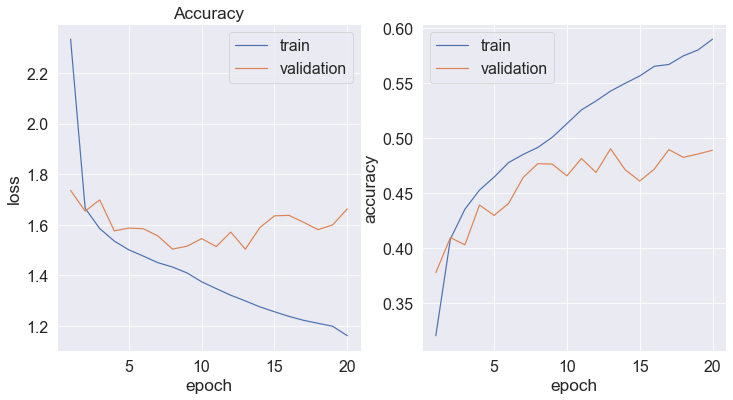

In [54]:
plot_history(simpleCNN.history.history)

## To może jakaś regularyzacja?
Niestety bardzo łatwo by sieci nauronowe przeuczały sie na zbiorze treniengowym, musiemy więc zastosować którąś z technik regularyzacji. Tutaj dodamy dodatkowy elelent struktury, tak zwany dropout.

### Dropout

In [72]:
tf.keras.layers.Dropout(0.3)

In [71]:
simpleCNN_dropout = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
                tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same'),
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(10, activation = 'softmax'),
            ]
        )

In [74]:
simpleCNN_dropout.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 16, 16, 16)        448       
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 256)             

In [75]:
simpleCNN_dropout.compile(optimizer=tf.keras.optimizers.Adam(), loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [76]:
simpleCNN_dropout.fit(train_dataset, epochs=50, validation_data = valid_dataset)

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.4915 - accuracy: 0.1966 - val_loss: 1.9787 - val_accuracy: 0.2639
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0351 - accuracy: 0.2503 - val_loss: 1.8422 - val_accuracy: 0.3234
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9170 - accuracy: 0.3025 - val_loss: 1.8249 - val_accuracy: 0.3417
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8305 - accuracy: 0.3419 - val_loss: 1.7445 - val_accuracy: 0.3858
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7922 - accuracy: 0.3601 - val_loss: 1.6841 - val_accuracy: 0.3943
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7652 - accuracy: 0.3708 - val_loss: 1.7597 - val_accuracy: 0.3968
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7351 - accuracy: 0.3830 - val_loss: 1.6258 - val_accuracy:

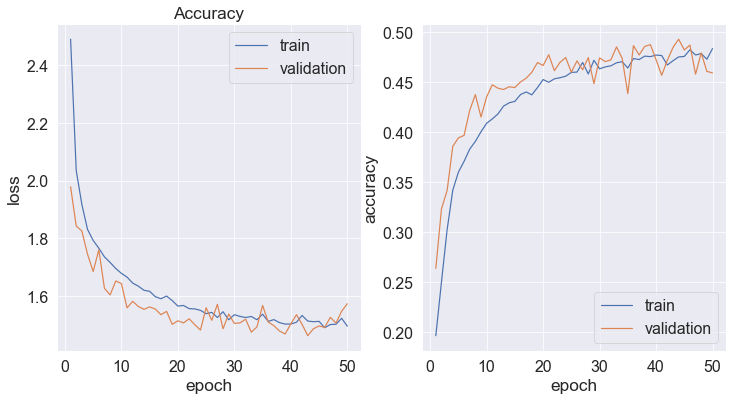

In [77]:
plot_history(simpleCNN_dropout.history.history)

# Przykłady różnych sieci konwolucyjnych

## AlexNet

In [85]:
class AlexNet(models.Sequential):
    def __init__(self):
        super().__init__()
        self._build_model()

    def _build_model(self):
        self.add(layers.Conv2D(96, 7, strides=4, padding='same'))
        self.add(layers.Lambda(tf.nn.local_response_normalization))
        self.add(layers.Activation('relu'))
        self.add(layers.MaxPooling2D(3, strides=2))

        self.add(layers.Conv2D(256, 5, strides=4, padding='same'))
        self.add(layers.Lambda(tf.nn.local_response_normalization))
        self.add(layers.Activation('relu'))
        self.add(layers.MaxPooling2D(3, strides=2))

        self.add(layers.Conv2D(384, 3, strides=4, padding='same'))
        self.add(layers.Activation('relu'))
        self.add(layers.Conv2D(384, 3, strides=4, padding='same'))
        self.add(layers.Activation('relu'))
        self.add(layers.Conv2D(256, 3, strides=4, padding='same'))
        self.add(layers.Activation('relu'))
        self.add(layers.Flatten())

        self.add(layers.Dense(4096, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(4096, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(10, activation='softmax'))
        self.build(input_shape=(None, 224, 224, 3))

In [86]:
alexnet = AlexNet()
alexnet.summary()

Model: "alex_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 56, 56, 96)        14208     
_________________________________________________________________
lambda_4 (Lambda)            (None, 56, 56, 96)        0         
_________________________________________________________________
activation_10 (Activation)   (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_5 (Lambda)            (None, 7, 7, 256)         0         
_________________________________________________________________
activation_11 (Activation)   (None, 7, 7, 256)         0

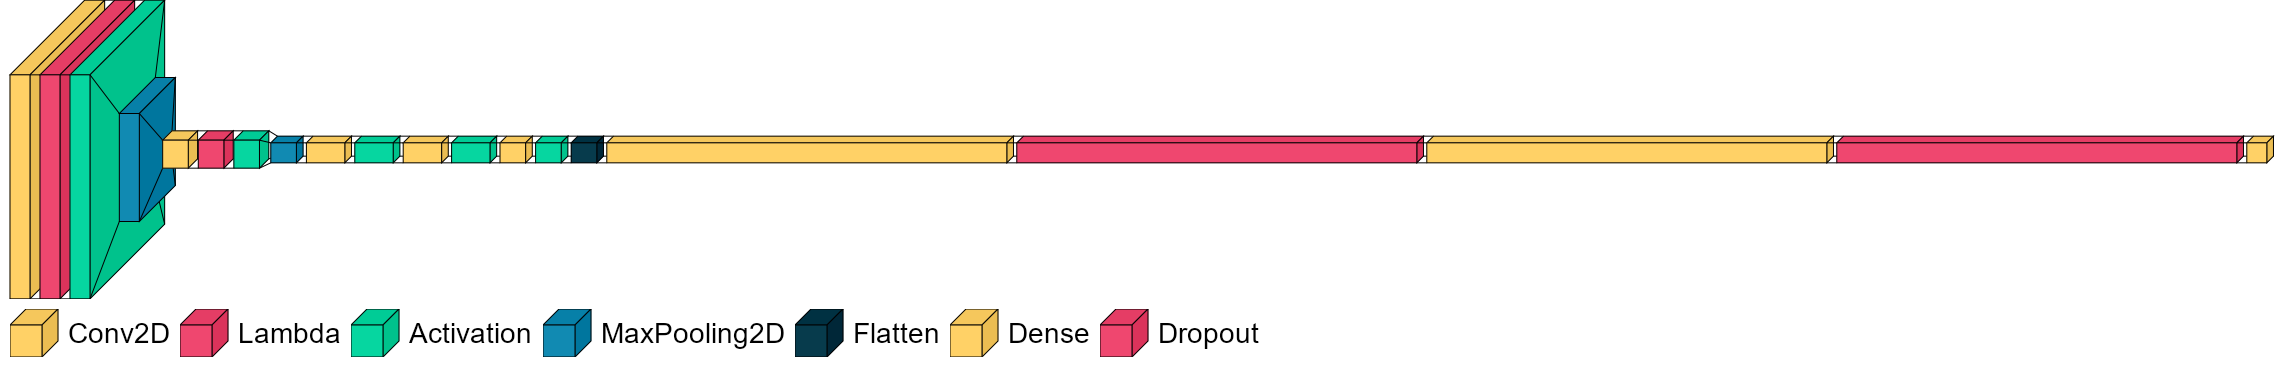

In [91]:
visualkeras.layered_view(alexnet, legend = True, font=font)

## VGG 

In [96]:
class VGG(models.Sequential):

    def __init__(self, **kwargs):
        super(VGG, self).__init__(**kwargs)

        self._build_model()

    def _build_model(self):
        self.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.MaxPooling2D())

        self.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.MaxPooling2D())

        self.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.MaxPooling2D())

        self.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.MaxPooling2D())

        self.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
        self.add(layers.MaxPooling2D())
        self.add(layers.Flatten())

        self.add(layers.Dense(4096))
        self.add(layers.Dense(4096))
        self.add(layers.Dense(1000, activation='softmax'))

        self.build(input_shape=(None, 224, 224, 3))

In [97]:
vgg = VGG()
vgg.summary()

Model: "vgg_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 56, 256)       295168

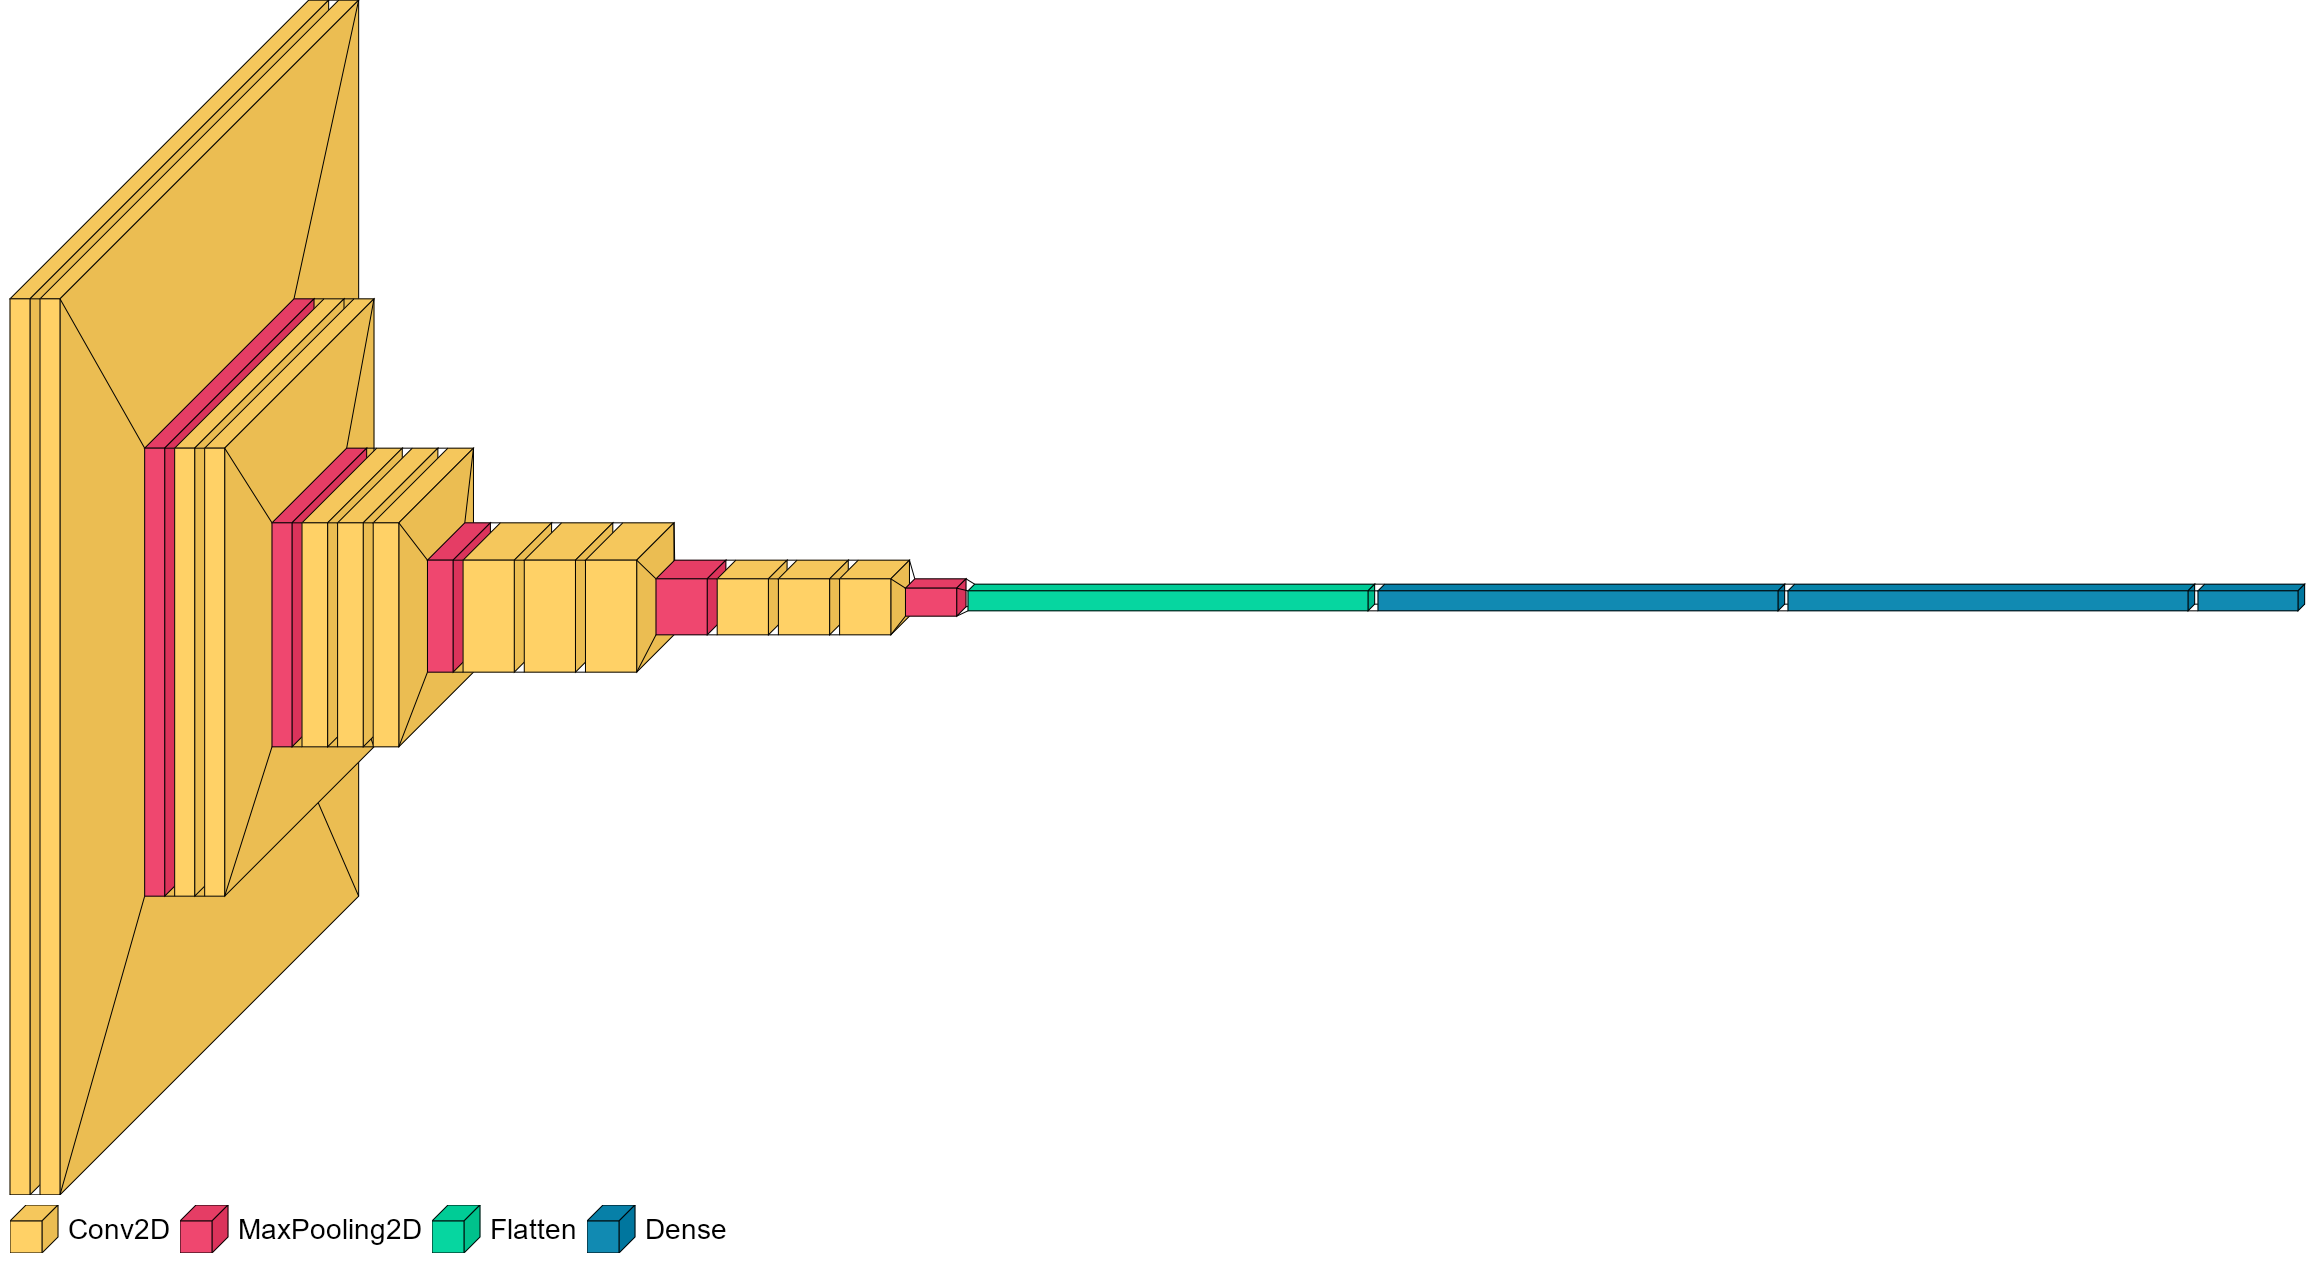

In [99]:
visualkeras.layered_view(vgg, legend = True, font=font)

## ResNet - 34
już się robi bardziej zaawansowanie

### ResNet Block

<img src="https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png" style="height:200px;"/>

In [104]:
class ResnetBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters, strides):
        super(ResnetBlock, self).__init__(name='')
        filters1, filters2 = filters
        strides1, strides2 = strides

        self.conv2a = layers.Conv2D(filters1, kernel_size, padding='same', strides=strides1)
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same', strides=strides2)
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.shortcut = models.Sequential()
        if strides1 != 1:
            self.shortcut = models.Sequential([
                layers.Conv2D(filters1, kernel_size=1, strides=strides1, use_bias=False),
                tf.keras.layers.BatchNormalization()
            ])

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)

        x += self.shortcut(input_tensor)
        return tf.nn.relu(x)

### Model 

In [105]:
class ResNet34(models.Sequential):
    def __init__(self, n=3, l2=0.01, **kwargs):
        super(ResNet34, self).__init__(**kwargs)
        self._build_model(n, l2)

    def _build_model(self, n=3, l2=0.01):
        self.add(layers.Conv2D(64, (3, 3), strides=2, padding='same'))


        for i in range(3):
            self.add(ResnetBlock(kernel_size=(3, 3), filters=[64, 64], strides=[1, 1]))

            
        for i in range(4):
            if i == 0:
                self.add(ResnetBlock(kernel_size=(3, 3), filters=[128, 128], strides=[2, 1]))
            else:
                self.add(ResnetBlock(kernel_size=(3, 3), filters=[128, 128], strides=[1, 1]))


        for i in range(6):
            if i == 0:
                self.add(ResnetBlock(kernel_size=(3, 3), filters=[256, 256], strides=[2, 1]))
            else:
                self.add(ResnetBlock(kernel_size=(3, 3), filters=[256, 256], strides=[1, 1]))
                
        for i in range(3):
            if i == 0:
                self.add(ResnetBlock(kernel_size=(3, 3), filters=[512, 512], strides=[2, 1]))
            else:
                self.add(ResnetBlock(kernel_size=(3, 3), filters=[512, 512], strides=[1, 1]))

        self.add(layers.GlobalAveragePooling2D())
        self.add(layers.Dense(1000, activation='softmax'))

        self.build((None, 224, 224, 3))

In [106]:
resnet34 = ResNet34()
resnet34.summary()

Model: "res_net34_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 112, 112, 64)      1792      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 112, 112, 64)      74368     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 112, 112, 64)      74368     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 112, 112, 64)      74368     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 56, 56, 128)       231168    
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 56, 56, 128)       296192    
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 56, 56, 128)       

ResNet-34 posiada zdecydowanie mniej parametrów niż VGG, a osiąga lepsze wyniki!

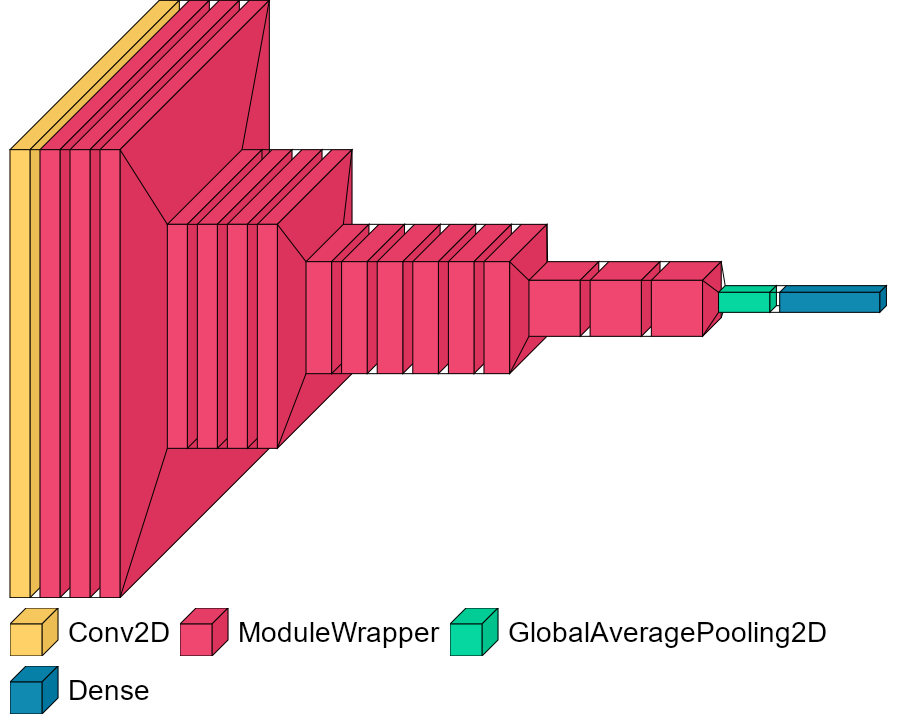

In [107]:
visualkeras.layered_view(resnet34, legend = True, font=font)

## Autoencodery
Czyli nauczanie nienadzorowane z redukcją wymiarowości obrazków

## Idea

![](https://miro.medium.com/max/1400/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png)

![](https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

### W praktyce 

In [111]:
latent_dim = 100

In [140]:
encoder = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(128,128,3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Flatten(),
        # No activation
        tf.keras.layers.Dense(latent_dim),
    ]
)

decoder = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(latent_dim)),
        tf.keras.layers.Dense(units=8*8*128, activation=tf.nn.relu),
        tf.keras.layers.Reshape(target_shape=(8, 8, 128)),
        tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding='same', activation='relu', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation='relu', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu', use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        # No activation
        tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=1, padding='same', activation='tanh'),
    ]
)

In [142]:
ae = tf.keras.Sequential([*encoder.layers, *decoder.layers])

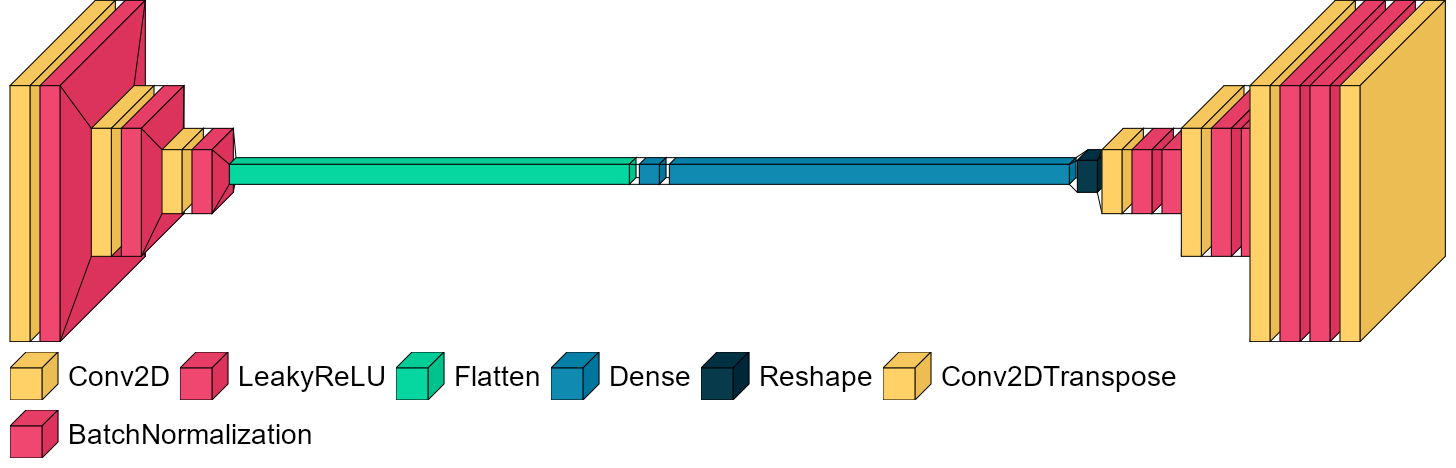

In [143]:
visualkeras.layered_view(ae, legend = True, font=font)

### Proces uczenia

Niestety nie jest on już tak prosty jak w przyapdku SimpleCNN, natomiast dobyr przykład widnieje jak zawsze na stronie [tensorflow](https://www.tensorflow.org/tutorials/generative/cvae)

![](https://www.tensorflow.org/tutorials/generative/cvae_files/output_2ZqAEtdqUmJF_0.gif)

## Używanie decodera jako generatora nowych zdjęć?
W teorii generując lososwy wektor z latent space i używając go jako input w generatorze powinnismy być w stanie otrzymać nowy obraz, nieistniejący w zbiorze uczącym. Rzeczywiście jest to możliwe, ale w praktyce struktury Autoencoderów potrzebują dużo zmian by było to skuteczne (Variational Autoencoders). Natomiast jest inne podejście

## Generative Adversarial Networks (GANs)

![](https://machinelearningmastery.com/wp-content/uploads/2019/04/Example-of-the-Generative-Adversarial-Network-Model-Architecture.png)

### Postępy w wynikach GANów

![](https://machinelearningmastery.com/wp-content/uploads/2019/04/Example-of-the-Progression-in-the-Capabilities-of-GANs-from-2014-to-2017.png)

obecnie state-of-the-art w przypadku twarzy osiąga [StyleGan3](https://github.com/NVlabs/stylegan3)

## Problemy w procesie uczenia